# IoT·인공지능·빅데이터 개론 및 실습 (2021년도, 2학기, M2177.004900_001)


##9/10 Logistic Regerssion & Neural Network with Scikit-Learn

Adapted by Seonwoo Min from the "An Introduction to Machine Learning with Scikit-learn" tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In this excercise, we will cover:

* Loading an example dataset & preprocessing
* Logistic regression & neural network models in scikit-learn
* Model training & prediction & evaluation
* Model save & load
* Homework

## 1. Loading an example dataset & preprocessing

In [1]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [13]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [14]:
# Data shape & statistics
print("Data: ", data['data'].shape)
print("Label:", data['target'].shape)

# Print the number of samples for each class
import numpy as np
#################### To Do #################################
for c in range(10):
    print('Class:', c,' Number:', np.sum(data['target'] == c) )
############################################################

Data:  (1797, 64)
Label: (1797,)
Class: 0  Number: 178
Class: 1  Number: 182
Class: 2  Number: 177
Class: 3  Number: 183
Class: 4  Number: 181
Class: 5  Number: 182
Class: 6  Number: 181
Class: 7  Number: 179
Class: 8  Number: 174
Class: 9  Number: 180


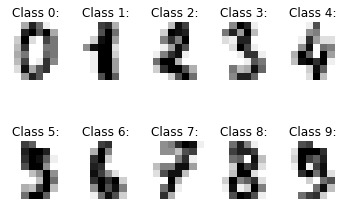

In [19]:
#############################################################
# Data Visaulization
#############################################################
import matplotlib.pyplot as plt
%matplotlib inline

#################### To Do #################################
# Hint: plt.imshow(data['data'][i].reshape(8,8), cmap=plt.cm.gray_r)
for c in range(10):
    i = 0
    while(1):
        if data['target'][i] == c :
            plt.subplot(2, 5, c+1) # 2 row, 5 column으로 이루어진 subplot
            plt.axis('off')
            plt.imshow(data['data'][i].reshape(8,8), cmap=plt.cm.gray_r)
            plt.title('Class %d:' % c)
            break
        i += 1
############################################################

In [26]:
#############################################################
# 1st Preprocessing
# Use the first 10 samples in each class as test data
# Use the others as training data
#############################################################

#################### To Do #################################
test_indexes, train_indexes = [], []
num = [0] * 10
for i in range(len(data['target'])):
    if num[data['target'][i]] < 10: test_indexes.append(i)
    else : train_indexes.append(i)
    num[data['target'][i]] += 1

test_data, test_target = data['data'][test_indexes], data['target'][test_indexes]
train_data, train_target = data['data'][train_indexes], data['target'][train_indexes]
############################################################

print(test_data.shape)
print(train_data.shape)

(100, 64)
(1697, 64)


In [30]:
#############################################################
# 2nd Preprocessing
# Let's use only 2 and 3 for binary classification
#############################################################

#################### To Do #################################
test_data23, test_target23 = test_data[(test_target == 2) ^ (test_target == 3)], test_target[(test_target == 2) ^ (test_target == 3)]
train_data23, train_target23 = train_data[(train_target == 2) ^ (train_target == 3)], train_target[(train_target == 2) ^ (train_target == 3)]
############################################################
# ^ = or operation

print(test_data23.shape)
print(train_data23.shape)

(20, 64)
(340, 64)


## 2. Logistic regression & neural network models in scikit-learn

For full documentations refer to the following links: <br>
Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
Neural network: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [43]:
#############################################################
# Logistic regression model
#############################################################
# Training
LR = LogisticRegression(max_iter=1, solver='sag')
LR.fit(train_data23, train_target23) # logistic regression model이 data에 맞춰 학습


# Prediction
train_predict23 = LR.predict(train_data23)
test_predict23 = LR.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

#################### To Do #################################
# Evaluation
train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23 = np.sum(test_target23 == test_predict23) / len(test_target23)
############################################################

print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
test_prediction : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
train_acc : 0.9941176470588236
test_acc  : 1.0


/Users/heetaecho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [58]:
#############################################################
# Neural network model
#############################################################
# https://machfam.com/16450
#################### To Do #################################
# Training
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1)
NN.fit(train_data23, train_target23)

# Prediction
train_predict23 = NN.predict(train_data23)
test_predict23 = NN.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

# Evaluation
train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23= np.sum(test_target23 == test_predict23) / len(test_target23)
print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)
############################################################

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
test_prediction : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 2 2 3]
train_acc : 0.8264705882352941
test_acc  : 0.95


/Users/heetaecho/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


## 4. Model save & load

In [62]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 
#joblib.dump(LR, 'modesl/LR23.joblib')

# load
NN_load = joblib.load('models/NN23.joblib') 
#LR_load = joblib.load('modesl/LR23.joblib')

#################### To Do #################################
# Prediction
train_predict23 = NN_load.predict(train_data23)
test_predict23 = NN_load.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

# Evaluation
train_acc23 = np.sum(train_target23 == train_predict23) / len(train_target23)
test_acc23= np.sum(test_target23 == test_predict23) / len(test_target23)
print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)
############################################################

test_target     : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 3 2 3]
test_prediction : [2 3 2 3 2 3 3 2 2 2 2 3 3 3 3 2 2 2 2 3]
train_acc : 0.8264705882352941
test_acc  : 0.95


## 5. Homework
Now it's your job to experiment with models and achieve higher accuracy on the  **<font color=red>on the entire dataset</font>**. <br>
Try different hyperparameter configurations and save the final model as "final_model.joblib" <br>
Submit the current **notebook file and the saved final model** on ETL.
* Maximum 10 points for >= 97% accuracy on the test set
* Maximum 8 points for >= 96% accuracy on the test set
* Maximum 6 points for >= 95% accuracy on the test set
* Maximum 4 points for >= 94% accuracy on the test set

In [326]:
#############################################################
# Try different hyperparameters
# Final model training
#############################################################

from sklearn.neural_network import MLPClassifier

#################### To Do #################################

NN = MLPClassifier(hidden_layer_sizes=(200, 200, 200), activation='relu', learning_rate_init=0.001, max_iter=1500)
NN.fit(train_data, train_target)

# Save 
import joblib
joblib.dump(NN, 'models/NN.joblib')

############################################################

['models/NN.joblib']

In [327]:
#############################################################
# Final model test
# Load the final model and obatin the test accuracy
#############################################################

# Load 
NN_load = joblib.load('models/NN.joblib')

#################### To Do #################################

train_predict = NN_load.predict(train_data)
test_predict = NN_load.predict(test_data)
print("test_target     :", test_target)
print("test_prediction :", test_predict)

# Evaluation
train_acc = np.sum(train_target == train_predict) / len(train_target)
test_acc= np.sum(test_target == test_predict) / len(test_target)
print("train_acc :", train_acc)
print("test_acc  :", test_acc)
############################################################

test_target     : [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 1 7 6 3 2 1 7 4 6 3 1 9 7 8 4 4 5 9 4 8 8]
test_prediction : [0 1 2 3 4 9 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 5 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 1 7 6 3 2 1 7 4 6 3 1 9 7 8 4 4 5 9 4 8 8]
train_acc : 1.0
test_acc  : 0.98



### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your model.
* Maximum 10 points

작성자 학번, 성함 (**반드시 작성해주세요**)

학번: 2013-10432

이름: 조희태

_Tell us here_

(hidden_layer_sizes=(10, 10), activation='relu', learning_rate_init=0.01, max_iter=100)으로 시작해보았습니다. 하지만 이 정도의 값으로는 정확도가 0.9 이상으로 올라가질 않아 우선적으로 hidden layer size를 (20, 20), (30, 30) 등으로 차차 늘려가다가 실습 수업 시간에 '하나의 hidden layer에 뉴런을 많이 쌓는 것보다 여러 hidden layer에 뉴런을 조금씩 쌓는게 좋더라'는 말씀이 기억이 나 최종적으로 (200, 200, 200)으로 값을 고정시켰습니다. 이후 learning rate를 0.001로 줄여 한 epoch마다 줄어드는 step_size를 확 낮춘 후 iteration을 대신 1000 이상으로 늘렸더니 정확도가 0.94 이상으로 안정적으로 유지되었고 최종적으로 98%의 정확도를 도출하였습니다.